In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import random



In [2]:
### get brent price file from drive and filled it with continous time series
brent_pathname = os.path.join(os.path.sep, 'Users', 'olive', 'Desktop', 'myprojects', 'fuelpredict', 
                              'data', 'Brent_eia.xls')
brent = pd.read_excel(brent_pathname, sheet_name = 'Data 1', skiprows = 2)
brent.set_index('Date', inplace = True)
brent.rename(columns={brent.columns[0]: 'price_USD'}, inplace = True)

# create a continuous date index from 1 Jan 2020 to last date in brent file
date_start = '2020-01-01'
brent_date_idx = pd.date_range(start = date_start, end = brent.index.max())

# fill date index in brent table with continuous date index
brent_filled = brent.reindex(brent_date_idx)
print(brent_filled)
# fill NaN for price with latest know price
brent_filled['price_USD'].fillna(method = 'ffill', inplace = True)
print(brent_filled)


            price_USD
2020-01-01        NaN
2020-01-02      67.05
2020-01-03      69.08
2020-01-04        NaN
2020-01-05        NaN
...               ...
2021-03-25      61.21
2021-03-26      63.77
2021-03-27        NaN
2021-03-28        NaN
2021-03-29      64.06

[454 rows x 1 columns]
            price_USD
2020-01-01        NaN
2020-01-02      67.05
2020-01-03      69.08
2020-01-04      69.08
2020-01-05      69.08
...               ...
2021-03-25      61.21
2021-03-26      63.77
2021-03-27      63.77
2021-03-28      63.77
2021-03-29      64.06

[454 rows x 1 columns]


In [10]:
### get Jan 2020 to March 2021 fuel file from drive
# create list of paths of CSV files from Jan 2020 to March 2021
pathlist = []
for m in range(1,10):
    newpath = os.path.join(os.path.sep, 'Users', 'olive', 'Desktop', 'myprojects', 'fuelpredict', 
                              'data', 'FuelWatchRetail-0{}-2020.csv'.format(m))
    pathlist.append(newpath)
for m in range(10,13):
    newpath = os.path.join(os.path.sep, 'Users', 'olive', 'Desktop', 'myprojects', 'fuelpredict', 
                              'data', 'FuelWatchRetail-{}-2020.csv'.format(m))
    pathlist.append(newpath)  
for m in range(1,4):
    newpath = os.path.join(os.path.sep, 'Users', 'olive', 'Desktop', 'myprojects', 'fuelpredict', 
                              'data', 'FuelWatchRetail-0{}-2021.csv'.format(m))
    pathlist.append(newpath)
pathlist

['\\Users\\olive\\Desktop\\myprojects\\fuelpredict\\data\\FuelWatchRetail-01-2020.csv',
 '\\Users\\olive\\Desktop\\myprojects\\fuelpredict\\data\\FuelWatchRetail-02-2020.csv',
 '\\Users\\olive\\Desktop\\myprojects\\fuelpredict\\data\\FuelWatchRetail-03-2020.csv',
 '\\Users\\olive\\Desktop\\myprojects\\fuelpredict\\data\\FuelWatchRetail-04-2020.csv',
 '\\Users\\olive\\Desktop\\myprojects\\fuelpredict\\data\\FuelWatchRetail-05-2020.csv',
 '\\Users\\olive\\Desktop\\myprojects\\fuelpredict\\data\\FuelWatchRetail-06-2020.csv',
 '\\Users\\olive\\Desktop\\myprojects\\fuelpredict\\data\\FuelWatchRetail-07-2020.csv',
 '\\Users\\olive\\Desktop\\myprojects\\fuelpredict\\data\\FuelWatchRetail-08-2020.csv',
 '\\Users\\olive\\Desktop\\myprojects\\fuelpredict\\data\\FuelWatchRetail-09-2020.csv',
 '\\Users\\olive\\Desktop\\myprojects\\fuelpredict\\data\\FuelWatchRetail-10-2020.csv',
 '\\Users\\olive\\Desktop\\myprojects\\fuelpredict\\data\\FuelWatchRetail-11-2020.csv',
 '\\Users\\olive\\Desktop\\mypro

In [46]:
fuel = pd.concat((pd.read_csv(f) for f in pathlist), ignore_index=True)
fuel

,PUBLISH_DATE,TRADING_NAME,BRAND_DESCRIPTION,PRODUCT_DESCRIPTION,PRODUCT_PRICE,ADDRESS,LOCATION,POSTCODE,AREA_DESCRIPTION,REGION_DESCRIPTION,Unnamed: 10
0,01/01/2020,53 Mile Roadhouse,United,ULP,140.7,31 South Western Hwy,PINJARRA,6208,Murray,Peel,NaN
1,01/01/2020,53 Mile Roadhouse,United,Diesel,144.7,31 South Western Hwy,PINJARRA,6208,Murray,Peel,NaN
2,01/01/2020,53 Mile Roadhouse,United,98 RON,160.9,31 South Western Hwy,PINJARRA,6208,Murray,Peel,NaN
3,01/01/2020,7-Eleven Ascot,7-Eleven,ULP,156.5,194 Great Eastern Hwy,ASCOT,6104,South of River,Metro,NaN
4,01/01/2020,7-Eleven Ascot,7-Eleven,Brand Diesel,151.9,194 Great Eastern Hwy,ASCOT,6104,South of River,Metro,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1169278,31/03/2021,Windmill Roadhouse,Liberty,Diesel,129.9,1 Darch St,REGANS FORD,6507,Regans Ford,Wheatbelt,NaN
1169279,31/03/2021,Yarrumba Service Station,Liberty,ULP,147.8,21 Jose St,MULLEWA,6630,Geraldton,Mid-West,NaN
1169280,31/03/2021,Yarrumba Service Station,Liberty,Diesel,146.5,21 Jose St,MULLEWA,6630,Geraldton,Mid-West,NaN
1169281,31/03/2021,Young Siding General Store,BP,ULP,140.5,19 Station St,YOUNGS SIDING,6330,Albany,Great Southern,NaN


In [47]:
# Filter Metro and ULP only
fuel = fuel[(fuel['REGION_DESCRIPTION'] == 'Metro') & (fuel['PRODUCT_DESCRIPTION'] == 'ULP')]
# Select three colums : date, station name,  price
fuel = fuel[['PUBLISH_DATE', 'TRADING_NAME', 'PRODUCT_PRICE']]
# rename columns
fuel.rename(columns = {fuel.columns[0]: 'date', fuel.columns[1]:'station_name', fuel.columns[2]:'ulp_price'}, inplace= True)

fuel.head()

,date,station_name,ulp_price
3,01/01/2020,7-Eleven Ascot,156.5
7,01/01/2020,7-Eleven Balcatta,153.9
11,01/01/2020,7-Eleven Balga,157.5
15,01/01/2020,7-Eleven Banksia Grove,157.5
19,01/01/2020,7-Eleven Bassendean,157.5


In [48]:
type(fuel)

pandas.core.frame.DataFrame

In [50]:
fuel.shape

(174994, 3)

In [51]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174994 entries, 3 to 1169266
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          174994 non-null  object 
 1   station_name  174994 non-null  object 
 2   ulp_price     174994 non-null  float64
dtypes: float64(1), object(2)
memory usage: 5.3+ MB


In [52]:
fuel['date'] = pd.to_datetime(fuel['date'], format='%d/%m/%Y')
fuel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174994 entries, 3 to 1169266
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          174994 non-null  datetime64[ns]
 1   station_name  174994 non-null  object        
 2   ulp_price     174994 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.3+ MB


In [53]:
fuel.sort_values(by=['station_name','date'], ignore_index=True, inplace=True)
fuel

,date,station_name,ulp_price
0,2020-01-01,7-Eleven Ascot,156.5
1,2020-01-02,7-Eleven Ascot,149.9
2,2020-01-03,7-Eleven Ascot,146.9
3,2020-01-04,7-Eleven Ascot,140.9
4,2020-01-05,7-Eleven Ascot,137.9
...,...,...,...
174989,2021-03-27,Wesco North Perth,142.0
174990,2021-03-28,Wesco North Perth,142.0
174991,2021-03-29,Wesco North Perth,142.0
174992,2021-03-30,Wesco North Perth,142.0


In [54]:
fuel['station_name'].unique()
fuel['station_name'].value_counts()


7-Eleven Forrestdale               450
Hills Emporio                      450
BP Kenwick                         450
Caltex StarMart Mosman Park        450
Coles Express Wanneroo Pearsall    450
                                  ... 
Vibe Piara Waters                   14
Ampol Foodary Karrinyup             10
Ampol Foodary Ashby                  6
Ampol Foodary Stratton               6
BP Ellenbrook                        2
Name: station_name, Length: 434, dtype: int64

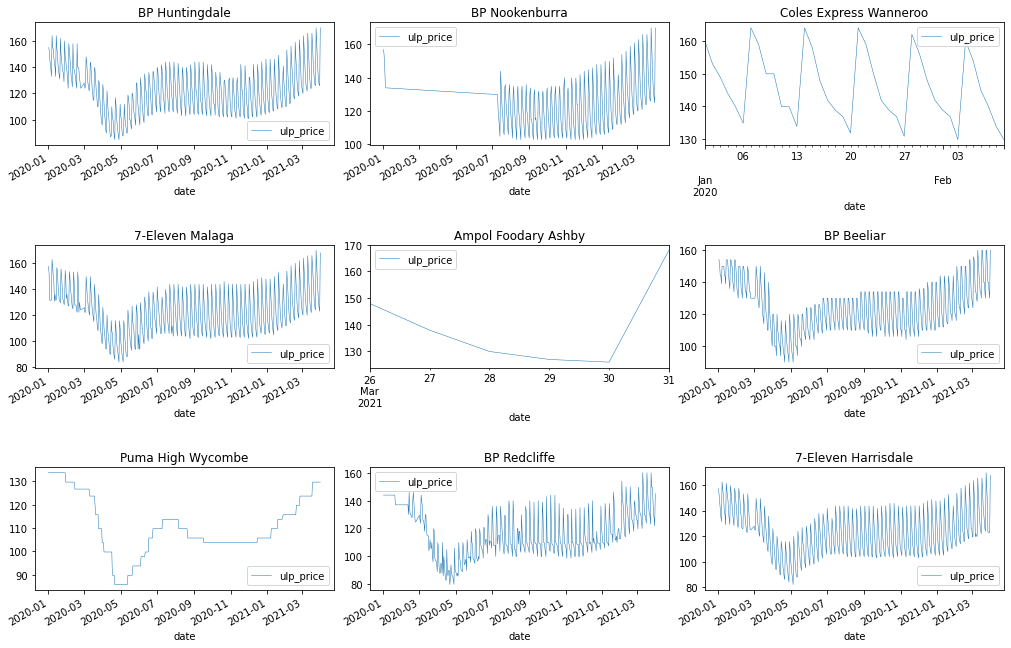

In [56]:
# display the charts of 9 random stations
name_list = fuel['station_name'].unique()
randidx = []
for i in range(9):
    indice = random.randint(0,len(name_list))
    randidx.append([i, indice, name_list[indice]])
    
#create subplot figure with having 3 side by side plots
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(14,10))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=10.0)
# unpack all the axes subplots
axe = axes.ravel()

for i in randidx:
    fuelnew = fuel[fuel['station_name'] == i[2]]
    fuelnew.plot(x='date', y='ulp_price', linewidth=0.5, title = fuelnew['station_name'].iloc[0], ax =axe[i[0]])

        

In [65]:
# select only stations with compete dates from Jan 2020 to Dec 2021
name_list = fuel['station_name'].unique()
name_count = fuel['station_name'].value_counts()
name_list2 = np.concatenate(name_list, np.array(name_count))
name_list2


TypeError: only integer scalar arrays can be converted to a scalar index

In [68]:
# select only stations with compete dates from Jan 2020 to Dec 2021
name_list = fuel['station_name'].unique()
name_count = fuel['station_name'].value_counts()

type(name_list)
name_list.shape
a = np.array(name_count)
type(a)
a.shape


(434,)